# Analyse des données

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('/content/gdrive/My Drive/DeepExo/cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

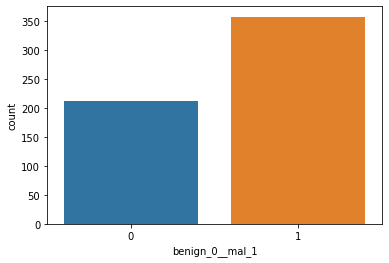

In [5]:
sns.countplot(x='benign_0__mal_1',data=df)

In [6]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [7]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

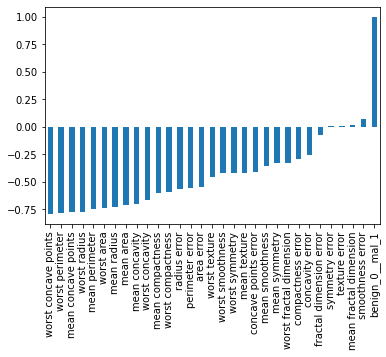

In [8]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

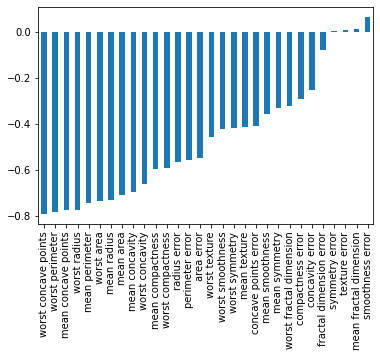

In [9]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

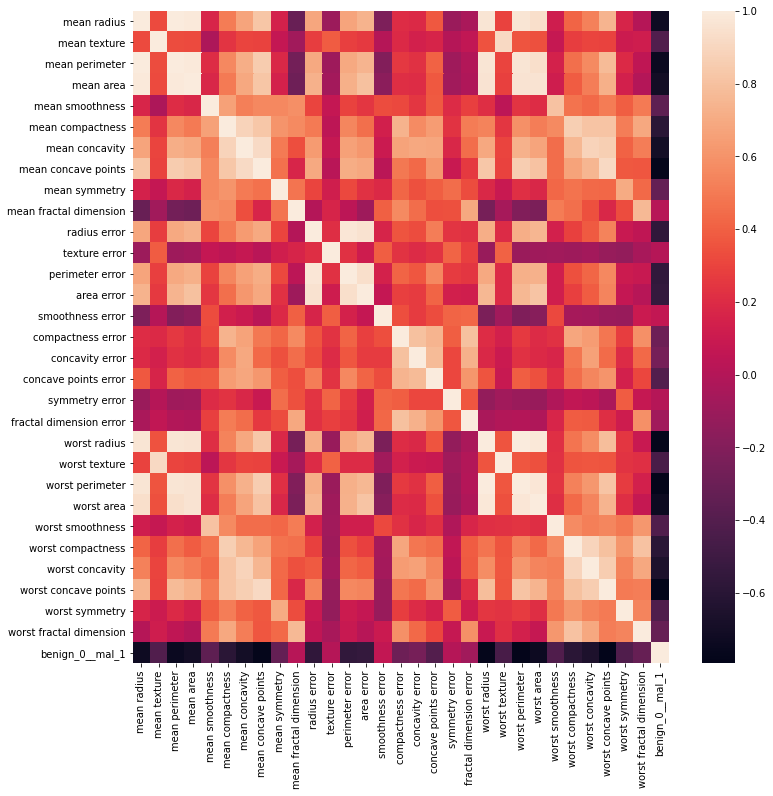

In [10]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

# Préparation de l'ANN


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [0]:
x = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=101)

In [19]:
scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [20]:
MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Evaluation du modèle

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [23]:
x_train.shape

(426, 30)

In [24]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(x=x_train,y=y_train, epochs=600, validation_data=(x_test, y_test), verbose=1)

Epoch 1/600
14/14 [==============================] - 0s 13ms/step - loss: 0.6658 - val_loss: 0.6456
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6362 - val_loss: 0.6172
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6041 - val_loss: 0.5848
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5702 - val_loss: 0.5417
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5262 - val_loss: 0.4902
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4731 - val_loss: 0.4376
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4240 - val_loss: 0.3845
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3784 - val_loss: 0.3365
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3385 - val_loss: 0.2995
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2944 - val_loss: 0.2658
Epoch 11

In [25]:
model_loss = pd.DataFrame(model.history.history)
model_loss

,loss,val_loss
0,0.665824,0.645643
1,0.636170,0.617245
2,0.604071,0.584761
3,0.570247,0.541714
4,0.526223,0.490233
...,...,...
595,0.010742,0.191033
596,0.010835,0.204484
597,0.010294,0.184581
598,0.013418,0.200534


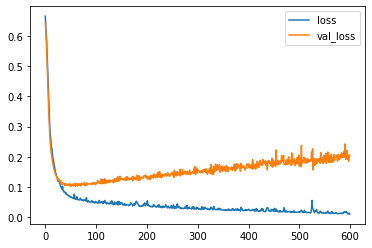

In [26]:
model_loss.plot()

#EarlyStopping

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model.fit(x=x_train, y=y_train, epochs=600, validation_data=(x_test, y_test), verbose=1,callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6951 - val_loss: 0.6708
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6538 - val_loss: 0.6333
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6135 - val_loss: 0.5950
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5731 - val_loss: 0.5519
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5229 - val_loss: 0.5084
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4850 - val_loss: 0.4619
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4427 - val_loss: 0.4195
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4058 - val_loss: 0.3748
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3630 - val_loss: 0.3395
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3344 - val_loss: 0.3079
Epoch 11/

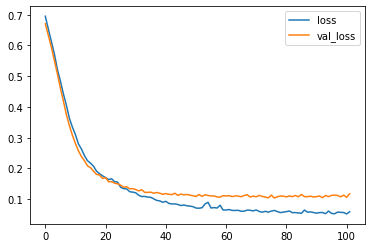

In [28]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

#Layer DropOut

In [0]:
from tensorflow.keras.layers import Dropout

In [30]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(x=x_train, y=y_train, epochs=600, validation_data=(x_test, y_test), verbose=1, callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.7392 - val_loss: 0.6752
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6828 - val_loss: 0.6473
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6477 - val_loss: 0.6268
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6338 - val_loss: 0.6020
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6405 - val_loss: 0.5724
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6003 - val_loss: 0.5455
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5672 - val_loss: 0.5174
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5423 - val_loss: 0.4876
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5151 - val_loss: 0.4576
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5035 - val_loss: 0.4300
Epoch 11/

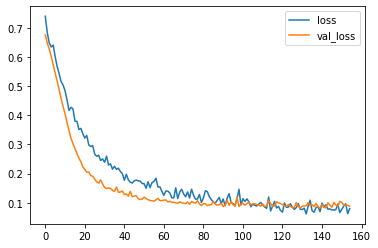

In [31]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Evalutaion du modèle

In [32]:
predictions = model.predict_classes(x_test)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [33]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [34]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
